<a href="https://colab.research.google.com/github/debbie105/data_analyze_fin/blob/main/%E5%A4%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

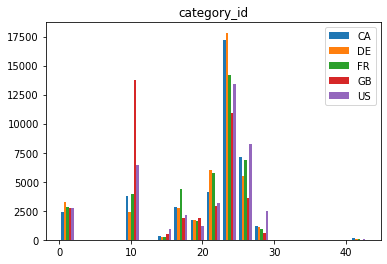

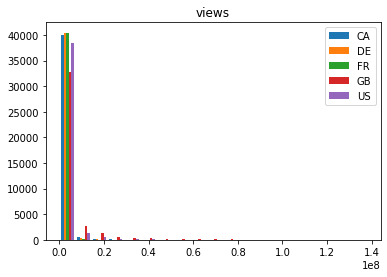

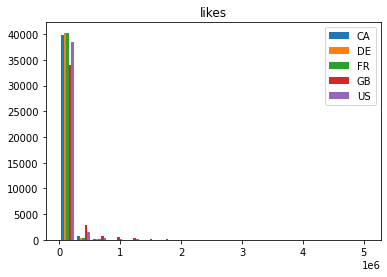

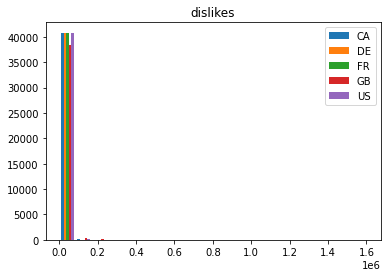

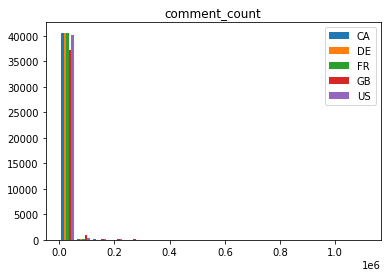

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import codecs
# from nltk import DecisionTreeClassifier
# from tensorflow import metrics

# 肌酐磷酸激酶 射血分數 血小板 血清肌酐 血清鈉
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.columns
#df[['age', 'creatinine_phosphokinase','ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']].hist(bins=20, figsize=(15, 15))

##### data_upload
ca = pd.read_csv("CAvideos.csv")
ca.columns
de = pd.read_csv("DEvideos.csv")
de.columns
fr = pd.read_csv("FRvideos.csv")
fr.columns
gb = pd.read_csv("GBvideos.csv")
gb.columns
#in_ = pd.read_csv("INvideos.csv", encoding='gbk')
#in_.columns
#jp = pd.read_csv("JPvideos.csv", encoding='gbk', errors = 'backslashreplace')
#jp.columns
#kr = pd.read_csv("KRvideos.csv", encoding='utf-8')
#kr.columns
#mx = pd.read_csv("MXvideos.csv")
#mx.columns
#mx.columns
#ru = pd.read_csv("RUvideos.csv")
#ru.columns
us = pd.read_csv("USvideos.csv")
us.columns

##### num_type_data
num_datas = 'category_id', 'views', 'likes', 'dislikes', 'comment_count'

##### plot_square_kinds
for i in range(5):
    bins = np.linspace(0, max(ca[num_datas[i]]), 20)
    plt.hist([ca[num_datas[i]], de[num_datas[i]], fr[num_datas[i]], gb[num_datas[i]], us[num_datas[i]]], bins, label=["CA", "DE", "FR", "GB", "US"])
    plt.legend(loc='upper right')
    plt.title(num_datas[i])
    plt.show()


In [ ]:
#continous_var = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
#df[continous_var].describe()
num_datas_list = ['category_id', 'views', 'likes', 'dislikes', 'comment_count']
print("CA",ca[num_datas_list].describe(),"\n")
print("DE",de[num_datas_list].describe(),"\n")
print("FR",fr[num_datas_list].describe(),"\n")
print("GB",gb[num_datas_list].describe(),"\n")
print("US",us[num_datas_list].describe(),"\n")



CA         category_id         views         likes      dislikes  comment_count
count  40881.000000  4.088100e+04  4.088100e+04  4.088100e+04   4.088100e+04
mean      20.795553  1.147036e+06  3.958269e+04  2.009195e+03   5.042975e+03
std        6.775054  3.390913e+06  1.326895e+05  1.900837e+04   2.157902e+04
min        1.000000  7.330000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%       20.000000  1.439020e+05  2.191000e+03  9.900000e+01   4.170000e+02
50%       24.000000  3.712040e+05  8.780000e+03  3.030000e+02   1.301000e+03
75%       24.000000  9.633020e+05  2.871700e+04  9.500000e+02   3.713000e+03
max       43.000000  1.378431e+08  5.053338e+06  1.602383e+06   1.114800e+06 

DE         category_id         views         likes      dislikes  comment_count
count  40840.000000  4.084000e+04  4.084000e+04  4.084000e+04   4.084000e+04
mean      20.705828  6.034553e+05  2.187550e+04  1.397136e+03   2.785857e+03
std        6.975813  2.348963e+06  1.018000e+05  1.457738e+04   1.74

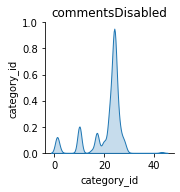

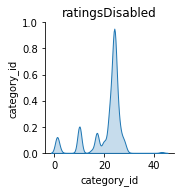

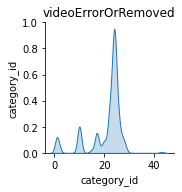

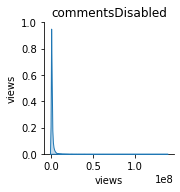

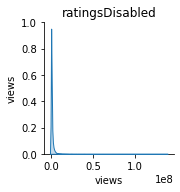

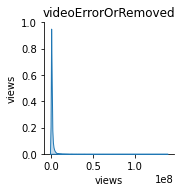

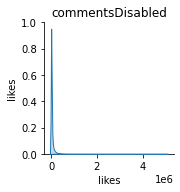

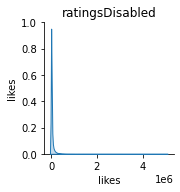

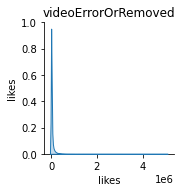

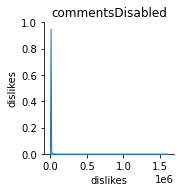

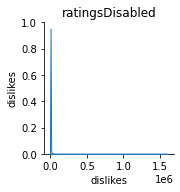

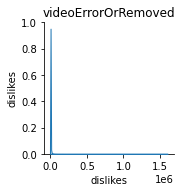

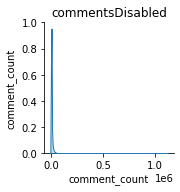

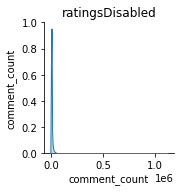

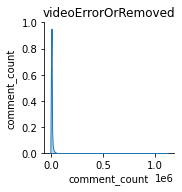

In [ ]:
import seaborn as sns
#df['sex1'] = df['sex'].replace({1: "Male", 0: "Female"})
#df['death'] = df['DEATH_EVENT'].replace({1: "yes", 0: "no"})
#sns.pairplot(df[["creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time", "death"]],hue = "death", diag_kind='kde', kind='scatter', palette='husl')
#plt.show()
#age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT

##### boolean_type_datas
#num_datas_list = ['category_id', 'views', 'likes', 'dislikes', 'comment_count']
bool_datas = 'comments_disabled','ratings_disabled','video_error_or_removed'
bool_datas_num = 'commentsDisabled','ratingsDisabled','videoErrorOrRemoved'
ca[bool_datas_num[0]] = ca[bool_datas[0]].replace({True:1, False:0})
for i in range(5):
    for j in range(3):
        sns.pairplot(ca[[num_datas[i]]],hue_order=bool_datas_num[j], diag_kind='kde', kind='scatter', palette='husl')
        plt.title(bool_datas_num[j])
        plt.show()

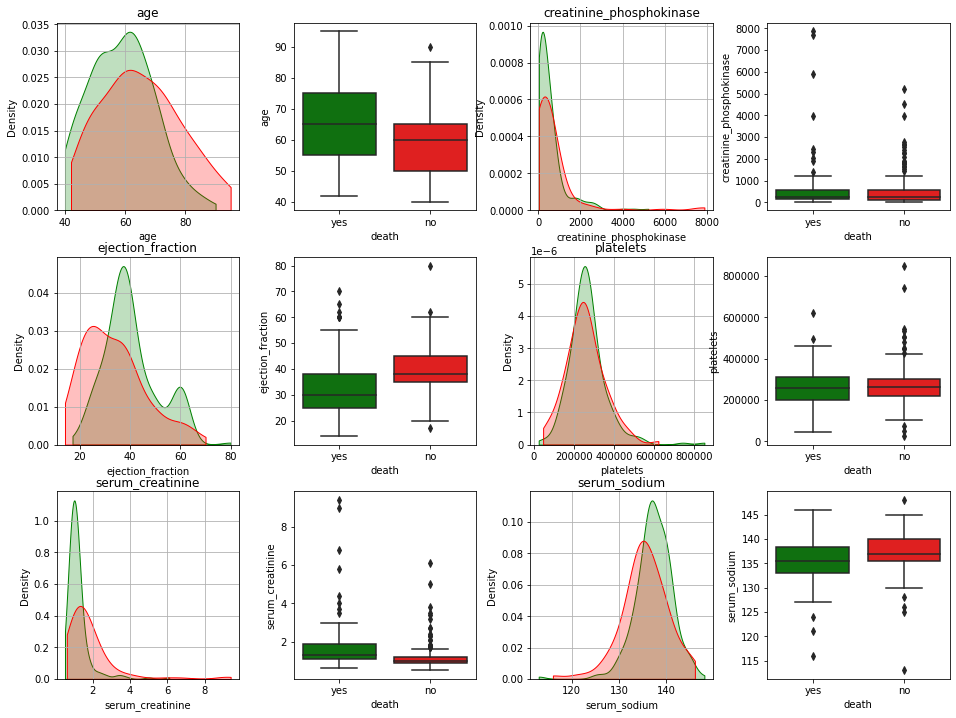

In [ ]:
continous_var = ['age', 'creatinine_phosphokinase','ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
plt.figure(figsize=(16, 25))
for i, col in enumerate(continous_var):
    plt.subplot(6, 4, i*2+1)
    plt.subplots_adjust(hspace =.25, wspace=.3)

    plt.grid(True)
    plt.title(col)
    sns.kdeplot(df.loc[df["death"]=='no', col], label="alive", color = "green", shade=True, kernel='gau', cut=0)
    sns.kdeplot(df.loc[df["death"]=='yes', col], label="dead",  color = "red", shade=True, kernel='gau', cut=0)
    plt.subplot(6, 4, i*2+2)
    sns.boxplot(y = col, data = df, x="death", palette = ["green", "red"])

In [ ]:
y = df.groupby("death")["creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"].agg([np.mean, np.median])
y

C:\Users\maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


creatinine_phosphokinase        ejection_fraction             platelets  \
                          mean median              mean median           mean   
death                                                                           
no                  540.054187    245          40.26601     38  266657.489901   
yes                 670.197917    259          33.46875     30  256381.044792   

                serum_creatinine        serum_sodium               time         
         median             mean median         mean median        mean median  
death                                                                           
no     263000.0         1.184877    1.0   137.216749  137.0  158.339901  172.0  
yes    258500.0         1.835833    1.3   135.375000  135.5   70.885417   44.5

In [ ]:
df.groupby(['sex1', 'high_blood_pressure', 'death']).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

death                             no       yes
sex1   high_blood_pressure                    
Female 0                    0.721311  0.278689
       1                    0.613636  0.386364
Male   0                    0.699248  0.300752
       1                    0.639344  0.360656

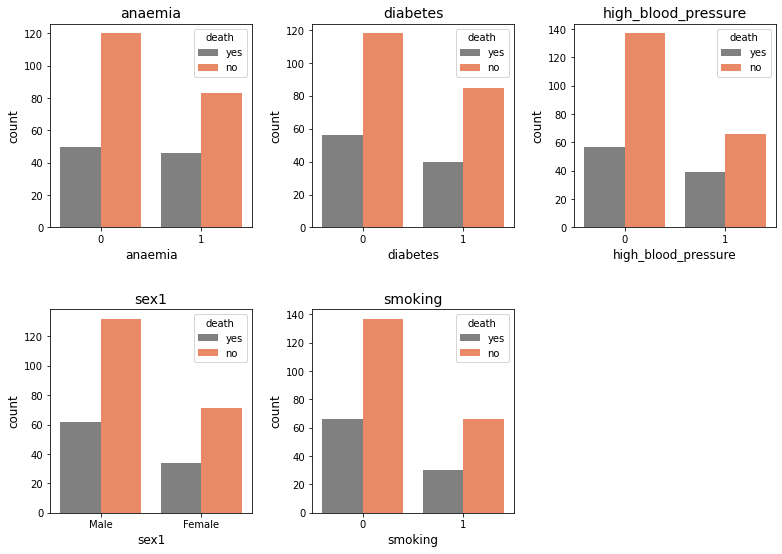

In [ ]:
binary_var = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex1', 'smoking']
plt.figure(figsize=(13, 9))
for i, var in enumerate(binary_var):
    plt.subplot(2, 3, i+1)
    plt.title(var, fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.subplots_adjust(hspace = 0.4, wspace = 0.3)
    sns.countplot(data= df, x = var, hue="death", palette = ['gray', "coral"])

In [ ]:
x = pd.crosstab(df["sex1"], df['death'])
x
x.apply(lambda z: z/z.sum(), axis=1)

death,no,yes
sex1,,
Female,0.676190,0.323810
Male,0.680412,0.319588


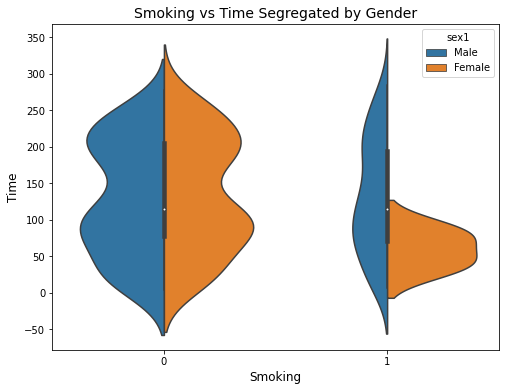

In [ ]:
plt.figure(figsize=(8, 6))
a = sns.violinplot(df.smoking, df.time, hue=df.sex1, split=True)
plt.title("Smoking vs Time Segregated by Gender", fontsize=14)
plt.xlabel("Smoking", fontsize=12)
plt.ylabel("Time", fontsize=12)
plt.show()

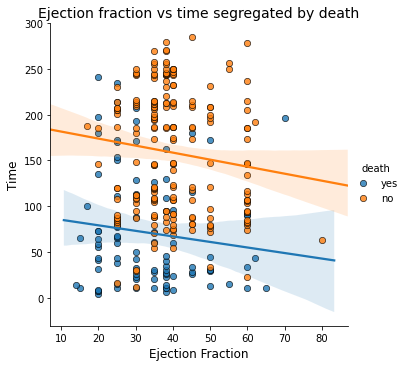

In [ ]:
sns.lmplot(x="ejection_fraction", y="time",
           hue="death", data=df,
           scatter_kws=dict(s=40, linewidths=0.7, edgecolors='black'))
plt.xlabel("Ejection Fraction", fontsize=12)
plt.ylabel("Time", fontsize=12)
plt.title("Ejection fraction vs time segregated by death", fontsize=14)
plt.show()

<Figure size 1600x640 with 0 Axes>

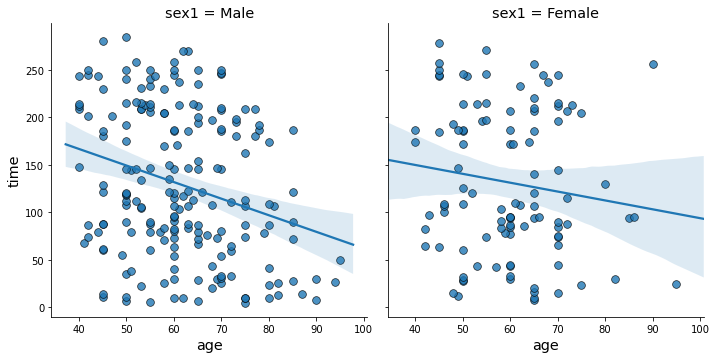

In [ ]:
fig = plt.figure(figsize=(20, 8), dpi=80)
g = sns.lmplot(x='age', y='time', data = df,
               robust = True,
               palette="Set1", col="sex1",
               scatter_kws=dict(s=60, linewidths=0.7, edgecolors="black"))
for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize='x-large')
    ax.set_ylabel(ax.get_ylabel(), fontsize='x-large')
    ax.set_xlabel(ax.get_xlabel(), fontsize='x-large')

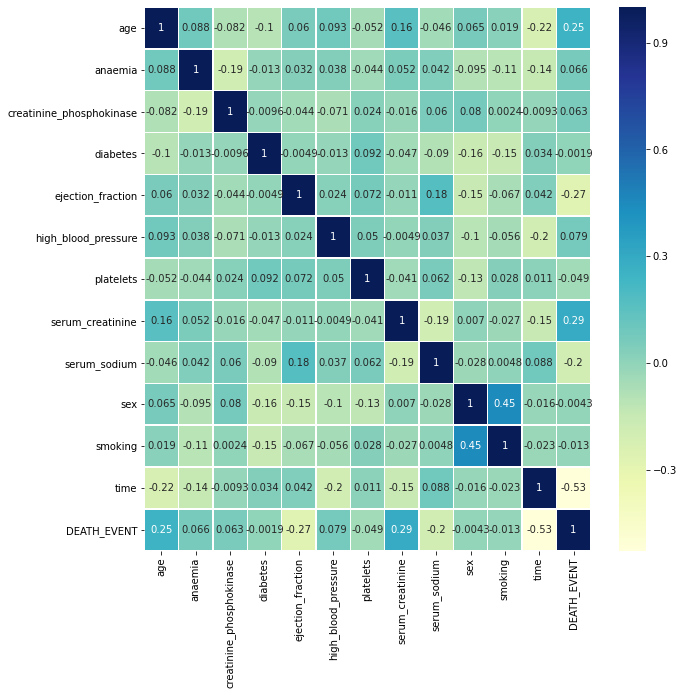

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, cmap="YlGnBu")
plt.show()

In [ ]:
df = df.drop(columns=['sex1', 'death'])
df = df.dropna()
df = df.drop(columns=['anaemia', 'diabetes', 'sex', 'smoking', 'creatinine_phosphokinase'])

df2 = df
continuous_var = ['age', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
for i in continuous_var:
    df2[i] = df2[i]/max(df2[i])

y = df2['DEATH_EVENT']
X = df2.drop(columns=['DEATH_EVENT'])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)

clf_tree = DecisionTreeClassifier(max_depth = 7, max_leaf_nodes=6).fit(X_train, y_train)
y_pred = clf_tree.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred),"Accuracy:")
print("Precision:",metrics.precision_score(y_test,y_pred,pos_label=0))
print("Recall:",metrics.recall_score(y_test,y_pred,pos_label=0))
print("F Score:",metrics.f1_score(y_test,y_pred,pos_label=0))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_pred))

KeyError: "['sex1' 'death'] not found in axis"